<a href="https://colab.research.google.com/github/gowtham-dd/LinearRegression/blob/main/Linear_Regression_Crash_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Medical Charges

In [62]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [63]:
medical_df=pd.read_csv('/content/insurance.csv')

In [64]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## EDA

In [65]:
# AGE

fig=px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [66]:
# BMI

fig=px.histogram(medical_df,x='bmi',marginal='box',nbins=38,title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [67]:
## Charges based on smoke

fig=px.histogram(medical_df,x='charges',marginal='box',color='smoker',title='Annual Medical Charge')
fig.update_layout(bargap=0.1)
fig.show()

In [68]:
## Charges based on age

fig=px.histogram(medical_df,x='charges',marginal='box',color='age',title='Annual Medical Charge')
fig.update_layout(bargap=0.1)
fig.show()

In [69]:
## Charges based on bmi

fig=px.histogram(medical_df,x='charges',marginal='box',color='bmi',title='Annual Medical Charge')
fig.update_layout(bargap=0.1)
fig.show()

In [70]:
## Age and Charges

fig=px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age vs Charges')
fig.show()

In [71]:
## BMI & Charges

fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [72]:

fig=px.violin(medical_df,x='children',y='charges',hover_data=['children'],title='children vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [73]:
# ## Categorical Data

# smoker_values={'no':1,'yes':1}
# smoker_numeric=medical_df.smoker.map(smoker_values)
# medical_df.smoker=smoker_numeric

In [74]:
# Corelation
print('Smoker with charges',medical_df.charges.corr(smoker_numeric))

Smoker with charges nan


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning:

invalid value encountered in divide



In [75]:
# # sns.heatmap(medical_df.corr(),annot=True)
# sex_values={'male':0,'female':1}
# sex_numric=medical_df.sex.map(sex_values)

# medical_df.sex=sex_numric
# medical_df.smoker.astype(int)

<Axes: >

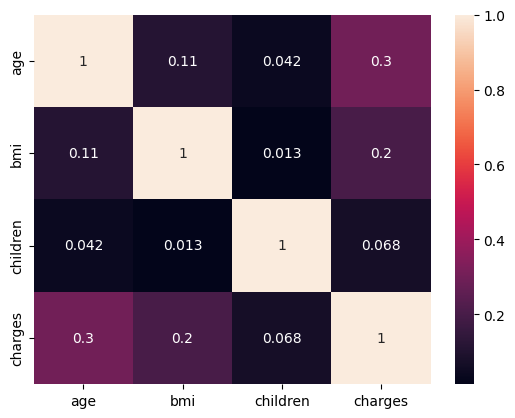

In [76]:
medical_cor=medical_df[['age','bmi','children','charges']]
medical_cor.corr()
sns.heatmap(medical_cor.corr(),annot=True)


## Linear Regression

In [77]:
non_smoker_df=medical_df[medical_df.smoker=='no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [78]:
# formula y=mx+c

def estimate_charges(age,w,b):
  return w*age + b

In [79]:
w=50
b=100
estimate_charges(30,w,b)

1600

In [81]:
 ages=non_smoker_df.age
 ages
estimate_charges=estimate_charges(ages,w,b)
estimate_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


## COST FUNCTION